In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.io
import scipy.signal

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
np.random.seed(1337)

In [8]:
def butter(x):
    hz = 1
    b, a = scipy.signal.butter(1, 0.0005/(hz/2))
    x['V0.5m'] = scipy.signal.filtfilt(b, a, x['V'])
    b, a = scipy.signal.butter(1, 0.0005/(hz/2))
    x['I0.5m'] = scipy.signal.filtfilt(b, a, x['I'])
    b, a = scipy.signal.butter(1, 0.005/(hz/2))
    x['V5m'] = scipy.signal.filtfilt(b, a, x['V'])
    b, a = scipy.signal.butter(1, 0.005/(hz/2))
    x['I5m'] = scipy.signal.filtfilt(b, a, x['I'])
    x.drop(columns=['V', 'I'], inplace=True)

In [6]:
mat = scipy.io.loadmat(r"D:\test_development\Battery\data2\Panasonic 18650PF Data prepared\Panasonic_NCR18650PF_Data_Normalized\Validation\n10degC_LA92_Pan18650PF.mat")
df = pd.DataFrame(mat['X']).T[[0, 3, 5]]
df.columns = ['V', '0.5m', '5m']

b, a = scipy.signal.butter(1, 0.01)
df['made 5m'] = scipy.signal.filtfilt(b, a, df['V'])
df

,V,0.5m,5m,made 5m
0,0.925403,0.925403,0.925403,0.925355
1,0.925403,0.925403,0.925403,0.925354
2,0.925403,0.925403,0.925403,0.925352
3,0.925403,0.925403,0.925403,0.925351
4,0.925403,0.925403,0.925403,0.925349
...,...,...,...,...
6851,0.182886,0.386141,0.178232,0.165262
6852,0.204143,0.385537,0.178705,0.164840
6853,0.159402,0.384897,0.178800,0.164396
6854,0.017729,0.383968,0.176008,0.163981


In [30]:
mat = scipy.io.loadmat(r"D:\test_development\Battery\data2\Panasonic 18650PF Data original\-10degC\Drive Cycles\06-07-17_08.39 n10degC_LA92_Pan18650PF.mat")
raw = pd.DataFrame()
for i, col in enumerate(mat['meas'][0][0]):
    raw = pd.concat([raw, pd.DataFrame(col, columns=[i])], axis=1)
raw.drop(columns=[3, 4, 5, 7, 8], inplace=True)
raw[0] = raw[0].str[0]
raw.loc[raw[0].str.len() < 15, 0] = raw[0] + ' 12:00:00 AM'
raw.index = pd.to_datetime(raw.pop(0), format='%m/%d/%Y %I:%M:%S %p')
raw.columns = ['V', 'I', 'T']

minmax = scipy.io.loadmat(r"D:\test_development\Battery\data2\Panasonic 18650PF Data prepared\Panasonic_NCR18650PF_Data_Normalized\Normalization\MIN_MAX_Normalization.mat")
raw = (raw - minmax['MIN'][0]) / (minmax['MAX'][0] - minmax['MIN'][0])
butter(raw)
raw = raw.resample('S').mean()
raw.dropna(how='all', inplace=True)
raw = raw.reset_index(drop=True)
raw

,V,I,T,V0.5m,I0.5m,V5m,I5m
0,0.930310,0.662927,0.703095,0.911882,0.660316,0.929422,0.662903
1,0.930310,0.662927,0.666253,0.911818,0.660308,0.929345,0.662903
2,0.929962,0.662927,0.621563,0.911755,0.660300,0.929266,0.662902
3,0.929613,0.662927,0.564664,0.911691,0.660291,0.929186,0.662901
4,0.929259,0.662927,0.508346,0.911627,0.660283,0.929106,0.662900
...,...,...,...,...,...,...,...
7064,0.529766,0.662927,0.269680,0.527847,0.662917,0.529634,0.662927
7065,0.529766,0.662927,0.268769,0.527854,0.662917,0.529665,0.662927
7066,0.529766,0.662927,0.268723,0.527860,0.662917,0.529685,0.662927
7067,0.529766,0.662927,0.268769,0.527863,0.662917,0.529697,0.662927


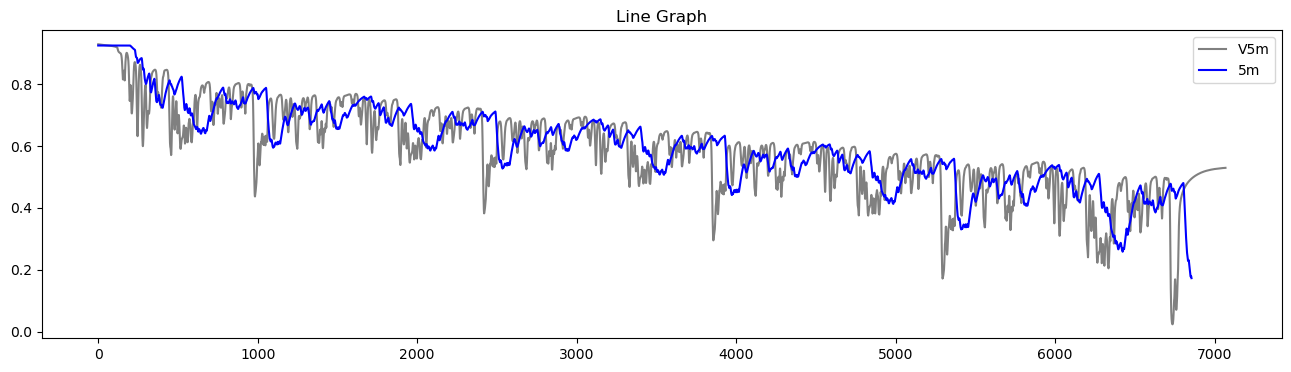

In [31]:
b, a = scipy.signal.butter(1, 0.01)
df['made 5m'] = scipy.signal.filtfilt(b, a, df['V'])

raw['V5m'].plot(figsize=(16, 4), legend=True, color='gray')
# df['V'].plot(figsize=(16, 4), legend=True, color='yellow')
df['5m'].plot(figsize=(16, 4), legend=True, color='blue')
# df['made 5m'].plot(figsize=(16, 4), legend=True, color='red')
# plt.legend(['butter->resemple', 'resample', 'paper', 'resample->butter'])
plt.title("Line Graph")
plt.show()


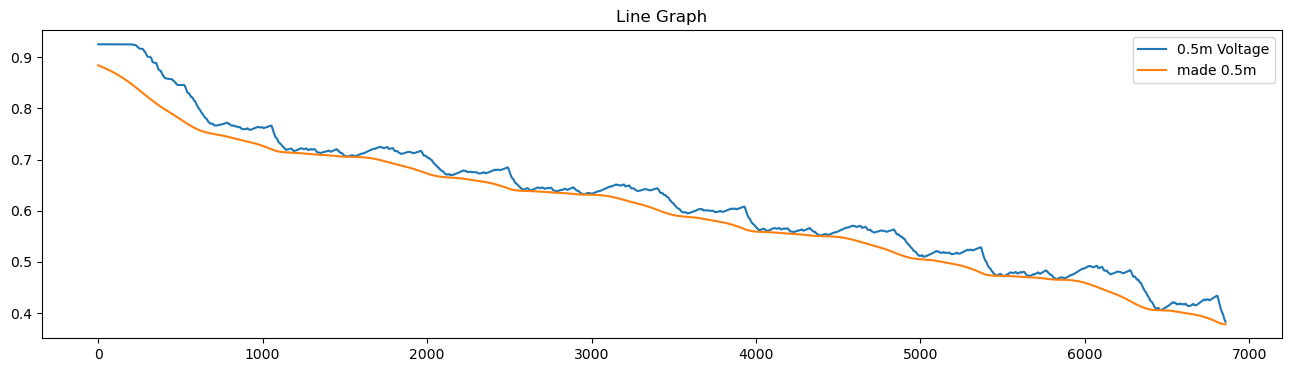

In [78]:
b, a = scipy.signal.butter(1, 0.001)
df['made 0.5m'] = scipy.signal.filtfilt(b, a, df['V'])

# df['V'].plot(figsize=(16, 4), legend=True)
df['0.5m'].plot(figsize=(16, 4), legend=True)
df['made 0.5m'].plot(figsize=(16, 4), legend=True)
# plt.legend(['raw', '5m Voltage', 'made 5m'])
plt.legend(['0.5m Voltage', 'made 0.5m'])
plt.title("Line Graph")
plt.show()


In [19]:
df.columns

Index(['V', '0.5m', '5m', 'made'], dtype='object')

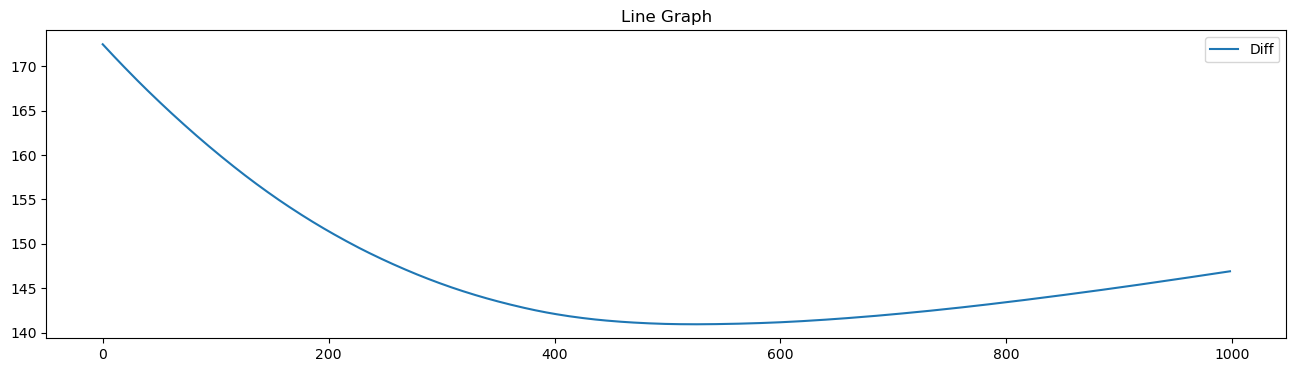

0.010230000000000001
140.96237660613917


In [187]:
min = 99999999999999
point = 0
values = []
for i in range(999):
    value = (0 + 1/2 + 0.001*i)*0.01
    b, a = scipy.signal.butter(1, value, btype='lowpass', output='ba')
    df['made'] = scipy.signal.filtfilt(b, a, df['V'])
    now = abs(df['made'] - df['5m']).sum()
    values.append(now)
    if now < min:
        min = now
        point = value
pd.DataFrame(values).plot(figsize=(16, 4), legend=True)
plt.legend(['Diff'])
plt.title("Line Graph")
plt.show()
print(point)
print(min)

In [179]:
mat = scipy.io.loadmat(r"D:\test_development\Battery\data2\Panasonic 18650PF Data original\0degC\5 pulse\05-20-17_10.44 0degC_5pulse_HPPC_Pan18650PF.mat")
x = pd.DataFrame()
for i, col in enumerate(mat['meas'][0][0]):
    x = pd.concat([x, pd.DataFrame(col, columns=[i])], axis=1)
x[0] = x[0].str[0]
x.loc[x[0].str.len() < 15, 0] = x[0] + ' 12:00:00 AM'
x.index = pd.to_datetime(x[0], format='%m/%d/%Y %I:%M:%S %p')
x = x.resample('S').mean()
y=x[3]
x.drop(columns=[3,4,5,7,8], inplace=True)

In [180]:
x

,1,2,6
0,,,
2017-05-20 10:44:02,4.15889,0.0,0.340295
2017-05-20 10:44:03,4.15889,0.0,0.468216
2017-05-20 10:44:04,4.15889,0.0,0.427463
2017-05-20 10:44:05,4.15889,0.0,0.471613
2017-05-20 10:44:06,4.15889,0.0,0.345956
...,...,...,...
2017-05-21 09:49:04,3.32763,0.0,0.777257
2017-05-21 09:49:05,3.32763,0.0,0.777257
2017-05-21 09:49:06,3.32827,0.0,0.777257


In [66]:
df.dropna(how='all', axis=1, inplace=True)
df.loc[(df!=0).any(axis=1)]

c:\Users\user\anaconda3\envs\sfdd\lib\site-packages\pandas\core\ops\array_ops.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


,0,0,0,0,0,0,0,0
0,[5/20/2017 10:44:02 AM],4.15889,0.0,0.00000,0.00000,0.0,0.335766,0.000000
1,[5/20/2017 10:44:02 AM],4.15889,0.0,0.00000,0.00000,0.0,0.347088,0.100995
2,[5/20/2017 10:44:02 AM],4.15889,0.0,0.00000,0.00000,0.0,0.347088,0.202001
3,[5/20/2017 10:44:02 AM],4.15889,0.0,0.00000,0.00000,0.0,0.335766,0.302000
4,[5/20/2017 10:44:02 AM],4.15889,0.0,0.00000,0.00000,0.0,0.335766,0.399998
...,...,...,...,...,...,...,...,...
85255,[5/21/2017 9:49:05 AM],3.32763,0.0,-2.47573,-8.28035,0.0,0.777257,83095.754002
85256,[5/21/2017 9:49:06 AM],3.32827,0.0,-2.47573,-8.28035,0.0,0.777257,83096.753000
85257,[5/21/2017 9:49:07 AM],3.32891,0.0,-2.47573,-8.28035,0.0,0.777257,83097.757994
85258,[5/21/2017 9:49:08 AM],3.32891,0.0,-2.47573,-8.28035,0.0,0.777257,83098.758994


In [93]:
x=pd.DataFrame([[1, 2]], index=[1.1,2])
for n, x_df in x.groupby(x.index.astype(int)):
    print(x_df)

     0  1
1.1  1  2
     0  1
2.0  1  2
